<h1 align="center"><font color='white'>Food Consumption</font></h1>

<center>
<img src="https://images.squarespace-cdn.com/content/v1/551a19f8e4b0e8322a93850a/1602020393443-L6M0DGZK4C75DRNR7GZH/Title_Animation.gif" width=600>

</center>


## Jako były kucharz i osoba siedząca w tematach jedzenia i wina w tym notebooku zajmę się analizą bazy danych z WHO na temat konsumpcji jedzenia na świecie czyli preferencji jedzeniowych, różnic między krajami, kobietami i mężczyznami. Myślę że bardzo ciekawe informacje tutaj wyciągnę i będzie można sie dowiedzieć dużo. coś jeszcze? 
### Najpierw sprawdzę:
1. jak baza danych jest skonstruowana, jakie zawiera informacje, jakie typy danych sie w niej znajdują, czy są puste dane wiec już na pierwszym kroku będzie ciekawie
1. następnie jakie poroblemy w mogą w niej wystąpić i co należy wyczyścić żeby móc z niej wygodnie korzystać 
1. pozbyć sie niepotrzebnych danych
1. kolejnym krokiem będzie znajdowanie potrzebnych danych oraz może znalezienie nowych ciekawych
1. a ostatecznie wizualizaja tych danych zeby łatwo móc widzieć tendencje które zaszly
1. I ostatni krok czyli podsumowanie, tutaj wyciągnę wnioski, 
1. co jeszcze?
1. czy bede robić to na wszystkich krajach czy wybiore konkretne?
1. jakie problemy napotkałem
1. do argumentacji można użyć tego badania https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3490048/
### jako osoba interesująca się tematami jedzenia 
dodać jeszcze to że jak sie najedzie na graph to pokazuje dokładna wartość
### ten notebook bedzie zawierać zarówno odpowiedź nap ostawione pytanie ale również mój proces myślowy podczas odpowiadania na pytanie

<h2 class="alert alert-block alert-danger">  
Projekt ten przedstawia mój tok myślenia oraz opinie! Wersja z czystą analizą dostępna jest na:    
</h2>

### [&uarr;](#top)

## Jako osoba która pracowała na kuchni i interesuje się kuchnią i tematami ją otaczającymi, w tym notatniku zajmę się analizą bazy danych z WHO na temat konsumpcji produktów na świecie. Moim planem jest odpowiedziec na pytanie jakie produkty są najpopularniejsze, na co to wskazuje, jakie są różnice między kobietami a mężczyznami oraz jak te dane można by wykorzystać tworząc menu do restauracji. Myślę że bardzo ciekawe informacje będzie można wyciągnąć z tych danych i będą one pomocne przy tworzeniu menu do restauracji. 
### Plan jest następujący:
1. Sprawdzenie jak skonstruowana jest baza danych, jakie informacje i typy danych znajdują sie w kolumnach. Niby łatwy krok ale bardzo ważny bo wiedza o bazie danych to podstawa dobrej analizy.
1. Z tą wiedzą pozbędę się kolumn które na pewno nie będą mi potrzebne.
1. Następnie sprawdzę gdzie znajdują sie puste dane oraz gdzie jest największe ryzyko ich znajdowania się, a potem pozbędę sie ich
1. 
1. 

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
    
1. [Hello](#hello)
    1. [YO](#essa)
1. [Usuwanie niepotrzebnych kolumn](#del_col)
1. [Pozostawianie tylko 2 liczb po przecinku](#)
1. [Usuwanie duplikatów](#del_dup)
1. [Summary](#summary)

# Źródła : 
1. https://www.slynyrd.com/blog/2020/9/30/pixelblog-30-food 
1. 
1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3490048/

		

In [1761]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import pycountry_convert as pc
plt.style.use('fivethirtyeight')

In [1762]:
food=pd.read_csv("fullcifocoss.csv", on_bad_lines='skip', sep=';', skipinitialspace = True)
pd.set_option('display.max_columns', None) # sprawiam że można przejrzeć wszystkie columny ponieważ deafaultowo jest ograniczona ilość wyświetlanych kolumn
food.head(19)

,BW,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Consumers_P05,Consumers_P90,Consumers_P95,Consumers_P975,Consumers_Standard_deviation,Number_of_subjects,Total_Mean,Total_Median,Total_P05,Total_P90,Total_P95,Total_P975,Total_Standard_deviation,ExtBW,ExtBWValue
0,0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,8.33,116.67,150.00,166.67,NaN,66172,1.06,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
1,0,China,2002,A000G,Oat grain,All,All,female,608,55.87,0.00,8.33,116.67,133.33,158.33,NaN,33953,1.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
2,0,China,2002,A000G,Oat grain,All,All,male,549,65.89,0.00,10.00,133.33,158.33,166.67,NaN,32219,1.12,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
3,0,China,2002,A000N,Buckwheat,All,All,All,167,55.26,0.00,8.33,100.00,116.67,158.33,NaN,66172,0.14,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
4,0,China,2002,A000N,Buckwheat,All,All,female,82,54.71,0.00,8.33,83.33,116.67,183.33,NaN,33953,0.13,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
5,0,China,2002,A000N,Buckwheat,All,All,male,85,55.80,0.00,8.33,100.00,116.67,133.33,NaN,32219,0.15,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
6,0,China,2002,A000P,Barley grains,All,All,All,61,38.58,0.00,6.67,66.67,83.33,116.67,NaN,66172,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
7,0,China,2002,A000P,Barley grains,All,All,female,28,37.50,0.00,3.33,66.67,83.33,100.00,NaN,33953,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
8,0,China,2002,A000P,Barley grains,All,All,male,33,39.49,0.00,8.33,83.33,116.67,166.67,NaN,32219,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
9,0,China,2002,A000T,Maize grain,All,All,All,2422,86.97,0.00,8.33,183.33,358.33,500.00,NaN,66172,3.18,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN


### Usuwanie niepotrzebnych kolumn <a id="del_col"></a>

In [1763]:
food.drop(columns=food.loc[:, 'Consumers_P05':'Consumers_Standard_deviation'], inplace=True)
food.drop(columns=food.loc[:, 'Total_P05':'ExtBWValue'], inplace=True)
food = food.drop(['BW'], axis=1)
food.head(10)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median
0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00
1,China,2002,A000G,Oat grain,All,All,female,608,55.87,0.00,33953,1.00,0.00
2,China,2002,A000G,Oat grain,All,All,male,549,65.89,0.00,32219,1.12,0.00
3,China,2002,A000N,Buckwheat,All,All,All,167,55.26,0.00,66172,0.14,0.00
4,China,2002,A000N,Buckwheat,All,All,female,82,54.71,0.00,33953,0.13,0.00
5,China,2002,A000N,Buckwheat,All,All,male,85,55.80,0.00,32219,0.15,0.00
6,China,2002,A000P,Barley grains,All,All,All,61,38.58,0.00,66172,NaN,0.00
7,China,2002,A000P,Barley grains,All,All,female,28,37.50,0.00,33953,NaN,0.00
8,China,2002,A000P,Barley grains,All,All,male,33,39.49,0.00,32219,NaN,0.00
9,China,2002,A000T,Maize grain,All,All,All,2422,86.97,0.00,66172,3.18,0.00


In [1764]:
food.shape

(544686, 13)

### ustawię jeszcze żeby na pewno wszystkie liczby miały 2 liczby po przecinku bo wolę taki wygląd a wrazie potrzeb zawsze mogę wrócić do deafaultowych ustawień

In [1765]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
food.head()

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median
0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00
1,China,2002,A000G,Oat grain,All,All,female,608,55.87,0.00,33953,1.00,0.00
2,China,2002,A000G,Oat grain,All,All,male,549,65.89,0.00,32219,1.12,0.00
3,China,2002,A000N,Buckwheat,All,All,All,167,55.26,0.00,66172,0.14,0.00
4,China,2002,A000N,Buckwheat,All,All,female,82,54.71,0.00,33953,0.13,0.00


### <a class="anchor" id="del_dup">usuwanie duplikatów</a>

In [1766]:
food.shape

(544686, 13)

In [1767]:
food = food.drop_duplicates()

In [1768]:
food.shape

(523276, 13)

In [1769]:
544686-523276 

21410

### pozbyliśmy się 21410 duplikatów

### Przy użyciu biblioteki missingno oraz metody isna sprawdzam gdzie znajdują sie puste dane

<Axes: >

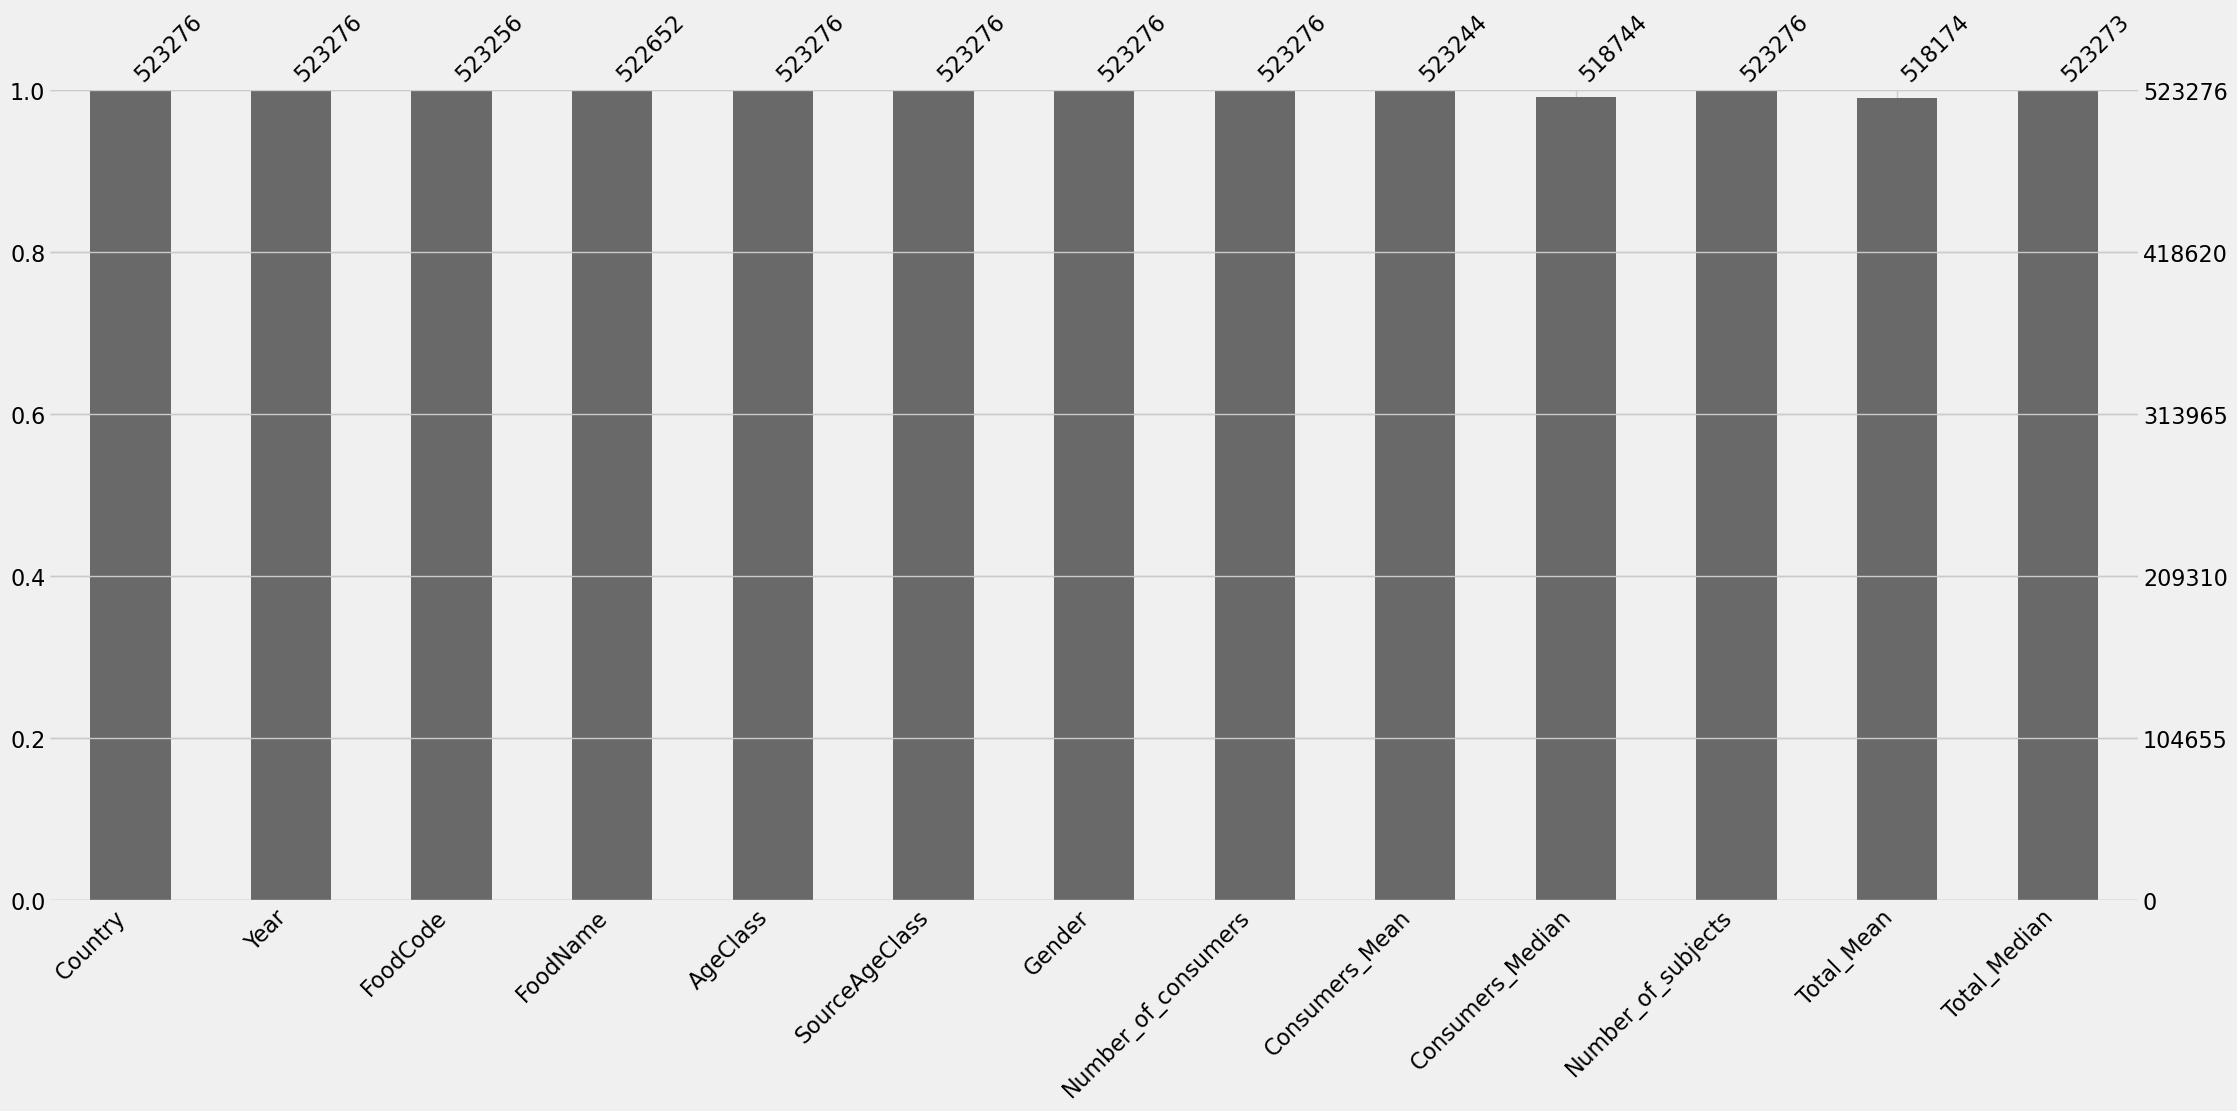

In [1770]:
msno.bar(food)

In [1771]:
food.isna().sum()

Country                   0
Year                      0
FoodCode                 20
FoodName                624
AgeClass                  0
SourceAgeClass            0
Gender                    0
Number_of_consumers       0
Consumers_Mean           32
Consumers_Median       4532
Number_of_subjects        0
Total_Mean             5102
Total_Median              3
dtype: int64

### Zarówno na wykresie jak i w tabeli widać że FoodName i FoodCode mają puste wartości (na razie nie zajmujemy sie innymi kolumnami z pustymi watościami bo nie wiedomo czy będą użyteczne) wiec zajmujemy sie usunięciem tych rzędów 

In [1772]:
null_data = food[food.isnull().any(axis=1)]
null_data.tail(5) # NaN w FoodCode widać dopiero na 50 ale dla wygody pozostaje default

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median
540608,Republic of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Children and Adolescents,3-5 years,All,692,2.26,0.84,804,1.95,0.59
540609,Republic of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Children and Adolescents,6-14 years,All,1937,1.89,0.81,2376,1.54,0.48
540610,Republic of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Adults and Elderly,15-49 years,All,6798,1.80,0.76,8253,1.48,0.48
540611,Republic of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Adults and Elderly,50-74 years,All,6054,2.04,0.76,7069,1.74,0.49
540612,Republic of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Adults and Elderly,>75 years,All,1204,1.97,0.40,1650,1.44,0.11


In [1773]:
food.loc[527540]

Country                Democratic Republic of the Congo
Year                                               2016
FoodCode                                            NaN
FoodName                                            NaN
AgeClass                                            All
SourceAgeClass                                      All
Gender                                              All
Number_of_consumers                                   1
Consumers_Mean                                     3.36
Consumers_Median                                   3.36
Number_of_subjects                                  214
Total_Mean                                         0.02
Total_Median                                       0.00
Name: 527540, dtype: object

### Tutaj widzimy że w FoodName i FoodCode puste dane są opisane jako NaN . Dodatkowo jest jeszcze długi kod który jest dłuższy to innych które widziałem i taki sam w każdym rzędzie gdzie są puste dane, także usunę FoodName i zobaczę czy nadal te kody pozostały jeżeli one nie opisują żadnego produktu to one także zostaną usunięte. prawdopodobnie własnie z powodu błędnego kodu produktu nie ma nazwy produktu.

In [1774]:
food = food.dropna(subset=['FoodName'])

In [1775]:
food.isna().sum()      

Country                   0
Year                      0
FoodCode                  0
FoodName                  0
AgeClass                  0
SourceAgeClass            0
Gender                    0
Number_of_consumers       0
Consumers_Mean           32
Consumers_Median       4532
Number_of_subjects        0
Total_Mean             5102
Total_Median              3
dtype: int64

### Wychodzi że nie ma już pustych danych. Poprzez usuwanie pustych danych w FoodName pozbyliśmy sie równiez pustych danych z FoodCode co znaczy że tylko po części było to tylko zależne od długości kodu i mogą być długie kody które działają. Jednak jeszcze trzeba sprawdzić czy produkty które miały kod fa6adbfab52e8a77f23df411f59c2150 też zostały usunięte, wstępnie z tego co widać poprawne kody nie są dłuższe niz 5 znaków, także sprawdzam czy istnieją dłuższe kody w kolumnie FoodCode.

In [1776]:
food.loc[food['FoodCode'] == "fa6adbfab52e8a77f23df411f59c2150"]

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median


In [1777]:
temp = food['FoodCode'].str.len() > 5
temp.value_counts()

FoodCode
False    516640
True       6012
Name: count, dtype: int64

### Wygląda na to, że tego konkretnego kodu sie pozbyłem ale kody których dlugoś jest większa od 5 nadal istnieją i pytanie czy one są poprawne czy nie

In [1778]:
checkpoint = food #tworzę checkpoint żeby móc łatwo wrócić do wersji przed sortowaniem
food['CodeLen'] = food['FoodCode'].str.len()
food.sort_values(by=['CodeLen'])

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median,CodeLen
0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00,5
348298,Portugal,2015,A00DH,Oat rolled grains,Children and Adolescents,Other children,Female,1,0.40,0.40,262,0.00,0.00,5
348297,Portugal,2015,A006R,Traditional unleavened breads,Children and Adolescents,Other children,Female,1,1.94,1.94,262,0.01,0.00,5
348296,Portugal,2015,A006P,"Rusk, wholemeal",Children and Adolescents,Other children,Male,1,1.63,1.63,259,0.01,0.00,5
348295,Portugal,2015,A006P,"Rusk, wholemeal",Children and Adolescents,Other children,Female,4,0.65,0.59,262,0.01,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251182,Nigeria,2011,17348df7c5044de2950b5bce2d8bb912,(All Meat and meat products),Children and Adolescents,6-14 years,female,0,0.00,0.00,1,0.00,0.00,32
275702,United States of America,2010,356d09ef45eb5879c5a334a1b9441094,(All Ingredients),Adults and Elderly,>75 years,All,1429,0.10,0.08,1595,0.09,0.07,32
275701,United States of America,2010,356d09ef45eb5879c5a334a1b9441094,(All Ingredients),Adults and Elderly,50-74 years,All,4496,0.11,0.08,5215,0.10,0.06,32
275699,United States of America,2010,356d09ef45eb5879c5a334a1b9441094,(All Ingredients),Children and Adolescents,6-14 years,All,3215,0.07,0.04,4330,0.05,0.02,32


In [1779]:
temp = food.loc[food['FoodCode'] == "a93a0316b93a7c2af9305e90012af119"]
len(temp)

458

### Wygląda na to, że nie wszystkie kody o dlugości 32 są błędne wiec sama długość nie jest powodem pustych danych
### Teraz sprawdzę czy wszystkie grupy wiekowe i ilość konsumentów składają się na grupę wiekową All. Dla wygody użyje tylko danych dla owsu i Chin

In [1780]:
food = checkpoint
food_all = food.loc[food['Gender'] == "All"]
food_all_oat = food_all.loc[food_all['FoodName'] == "Oat grain"]
food_all_oat_ch = food_all_oat.loc[food_all_oat['Country'] == "China"]

food_all_oat_ch.head(20)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median,CodeLen
0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00,5
812,China,2002,A000G,Oat grain,Infants and Toddlers,0-35 months,All,10,28.58,0.00,838,0.34,0.00,5
1251,China,2002,A000G,Oat grain,Children and Adolescents,3-5 years,All,20,22.00,0.00,2235,0.20,0.00,5
1782,China,2002,A000G,Oat grain,Children and Adolescents,6-14 years,All,107,39.97,0.00,9844,0.43,0.00,5
2487,China,2002,A000G,Oat grain,Adults and Elderly,15-49 years,All,545,66.67,0.00,33719,1.08,0.00,5
3267,China,2002,A000G,Oat grain,Adults and Elderly,50-74 years,All,438,62.06,0.00,18143,1.50,0.00,5
4020,China,2002,A000G,Oat grain,Adults and Elderly,>75 years,All,37,43.87,0.00,1393,1.17,0.00,5
279440,China,2002,A000G,Oat grain,All,All,All,1157,1.12,NaN,66172,NaN,0.00,5
280252,China,2002,A000G,Oat grain,Infants and Toddlers,0-35 months,All,10,2.00,NaN,838,NaN,0.00,5
280691,China,2002,A000G,Oat grain,Children and Adolescents,3-5 years,All,20,1.31,NaN,2235,NaN,0.00,5


### Już teraz widać ze są problemy. Dane się powtarzają ale nie we wszystkich kolumnach. W przypadku  grupy wiekowej all, Number_of_consumers i Number_of_subjects mają takie same liczby ale inne kolumny albo nie maja danych albo maja inne wartośći. Znaczy to, że są tu powielone rzędy i trzeba pozbyć sie tych duplikatów. Wygląda na to, że najlepszym sposobem byłoby zrobienie tego usuwając rzędy w których jest NaN w Consumers_Median i Total_Mean tylko pytanie czy te kolumny są wiarygodne wiec trzeba sprawdzić czy te liczby są prawdziwe 
### jako że nie ma legendy jak dokładnie są liczone te wartości i co na pewno znaczą samemu spróbuje to zrozumieć, a jeżeli nie będą one dawać poprawnych wyników to zostaną usunięte

In [1781]:
food_all_oat_ch['Consumers_Mean'].iloc[0] 

60.623

In [1782]:
1157/66172*100 # procent konsumentów z całej puli badanych 

1.748473674666022

In [1783]:
66172/1157 #liczba badanych podzielona przez liczbę konsumentów

57.19273984442524

In [1784]:
(1.12+66172)/1157 # połączona liczba badanych podzielona przez liczbę konsumentów

57.193707865168534

In [1785]:
food_all_oat_ch['Consumers_Mean'].iloc[1:7].sum()

263.15090000000004

In [1786]:
food_all_oat_ch['Consumers_Mean'].iloc[1:7].mean()

43.85848333333334

In [1787]:
food_all_oat_ch['Number_of_consumers'].iloc[:7].mean()

330.57142857142856

In [1788]:
food_all_oat_ch['Number_of_consumers'].iloc[0]/food_all['Number_of_consumers'].iloc[1:7].sum()

0.01670516892867456

### Żadne obliczenia nie daja takiej wartości jaka jest w kolumnie Consumers_Mean, więc albo są to jakieś inne dane np średnia ilość gramów spożywanego produktu przez ankietowanych albo coś zupełnie innego ale bez odpowiedniej wiedzy nie można tego założyć. Znaczy to ze trzeba sie pozbyć tych kolumn, gdyż nawet gdyby pomocne, mogą one zawierać fałsyzwe wartości 
### Uswam więc: Consumers_Mean, Consumers_Median, Total_Mean, Total_Median i dodatkowo CodeLen które i tak już nie będzie użyteczne dla mnie

In [1789]:
food.shape

(522652, 14)

In [1790]:
food = food.drop(['Consumers_Mean', 'Consumers_Median', 'Total_Mean', 'Total_Median', 'CodeLen'], axis=1)
food.shape

(522652, 9)

In [1791]:
food

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
0,China,2002,A000G,Oat grain,All,All,All,1157,66172
1,China,2002,A000G,Oat grain,All,All,female,608,33953
2,China,2002,A000G,Oat grain,All,All,male,549,32219
3,China,2002,A000N,Buckwheat,All,All,All,167,66172
4,China,2002,A000N,Buckwheat,All,All,female,82,33953
...,...,...,...,...,...,...,...,...,...
544675,Republic of Korea,2015,A16MR,"Juice concentrate, pineapple",Adults and Elderly,15-49 years,male,1,3518
544679,Republic of Korea,2015,A16MR,"Juice concentrate, pineapple",All,All,male,1,9114
544680,Republic of Korea,2015,A16MR,"Juice concentrate, pineapple",All,All,female,2,11557
544684,Republic of Korea,2015,A16MR,"Juice concentrate, pineapple",Adults and Elderly,15-49 years,All,1,8253


### Wszystko poszło dobrze, pozbyliśmy sie 5 kolumn, wiec teraz czas na usuwanie duplikatów, zrobie to za pomocą drop.duplicates po prostu, powinno to teraz pozbyć sie rzędów w których sa te same dane, ponieważ już nic innego nie powinno powodować tu błędów.food.shape

In [1792]:
food.shape

(522652, 9)

In [1793]:
food = food.drop_duplicates()
food.shape

(272016, 9)

In [1794]:
544032-272016


272016

### Z tego co widać dane były podwojone, jest to bardzo duża ilość, wiec bardzo dobrze, że to zostało zauważone, bo inaczej mogło by zakłamać wynik analizy.
### Teraz można sprawdzić czy suma szystkich grup, daje taki sam wynik jak dla grupy wiekowej all.

In [1795]:
food_all = food.loc[food['Gender'] == "All"]
food_all_oat = food_all.loc[food_all['FoodName'] == "Oat grain"]
food_all_oat_ch = food_all_oat.loc[food_all_oat['Country'] == "China"]
food_all_oat_ch.head(10)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
0,China,2002,A000G,Oat grain,All,All,All,1157,66172
812,China,2002,A000G,Oat grain,Infants and Toddlers,0-35 months,All,10,838
1251,China,2002,A000G,Oat grain,Children and Adolescents,3-5 years,All,20,2235
1782,China,2002,A000G,Oat grain,Children and Adolescents,6-14 years,All,107,9844
2487,China,2002,A000G,Oat grain,Adults and Elderly,15-49 years,All,545,33719
3267,China,2002,A000G,Oat grain,Adults and Elderly,50-74 years,All,438,18143
4020,China,2002,A000G,Oat grain,Adults and Elderly,>75 years,All,37,1393


In [1796]:
food_all_oat_ch['Number_of_consumers'].iloc[1:].sum()

1157

In [1797]:
food_all_oat_ch['Number_of_consumers'].iloc[0]

1157

### Wychodzi na to że wszystko sie zgadza, wiec czyszczenie danych sie powiodło, także czas na grupowanie i wizualizacje
### Tworzymy dataframes dla all, kobiet i mężczyzn, ale najpierw sprawdzam jak wyglądają dane w kolumnie gender

In [1798]:
food['Gender'].unique()

array(['All', 'female', 'male', 'Female', 'Male'], dtype=object)

### jak widać dobrze, że sprawdziłem bo są tutaj dwie wersje Male i Female. Oznacza to, że muszę ujednolicić te dane i dla bezpieczeństwa nie tylko w kolumnie gender

In [1799]:
# zrobie tak bo po tylko 3 kolumny zmieniam
food['Gender'] = food['Gender'].str.title()
food['FoodName'] = food['FoodName'].str.title()
food['Country'] = food['Country'].str.title()

In [1800]:
food['Gender'].unique()

array(['All', 'Female', 'Male'], dtype=object)

In [1801]:
food_all = food.loc[food['Gender'] == "All"]
food_fem = food.loc[food['Gender'] == "Female"]
food_men = food.loc[food['Gender'] == "Male"]

### Zrobię też od razu rodzielenie na wszystkie grupy wiekowe

In [1802]:
food_all_all = food_all.loc[food_all['AgeClass'] == "All"]
food_fem_all = food_fem.loc[food_fem['AgeClass'] == "All"]
food_men_all = food_men.loc[food_men['AgeClass'] == "All"]
food_all_all.head()

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
0,China,2002,A000G,Oat Grain,All,All,All,1157,66172
3,China,2002,A000N,Buckwheat,All,All,All,167,66172
6,China,2002,A000P,Barley Grains,All,All,All,61,66172
9,China,2002,A000T,Maize Grain,All,All,All,2422,66172
12,China,2002,A001B,Common Millet Grain,All,All,All,9069,66172


In [1803]:
food_fem_all.head(5)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
1,China,2002,A000G,Oat Grain,All,All,Female,608,33953
4,China,2002,A000N,Buckwheat,All,All,Female,82,33953
7,China,2002,A000P,Barley Grains,All,All,Female,28,33953
10,China,2002,A000T,Maize Grain,All,All,Female,1355,33953
13,China,2002,A001B,Common Millet Grain,All,All,Female,4740,33953


### Wszystko wygląda dobrze wiec zajmę sie teraz sprawdzeniem z jakich krajów dane głownie były zbierane 

In [1804]:
food_all_all['Country'].unique()

array(['China', 'Republic Of Korea', 'United States Of America', 'Brazil',
       'Italy', "Lao People'S Democratic Republic", 'Mexico',
       'Mozambique', 'Malaysia', 'Nigeria', 'Pakistan', 'Philippines',
       'Burkina Faso', 'Bangladesh', 'Romania', 'Bulgaria', 'Uganda',
       'Bolivia (Plurinational State Of)', 'Zambia',
       'Democratic Republic Of The Congo', 'Ethiopia', 'Guatemala',
       'India'], dtype=object)

In [1805]:
food_all_all['Country'].nunique()

23

In [1806]:
food['Country'].unique()

array(['China', 'Republic Of Korea', 'Cyprus', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Greece', 'Hungary', 'Ireland',
       'Latvia', 'Netherlands', 'Portugal', 'Romania', 'Slovenia',
       'Spain', 'Sweden', 'United Kingdom', 'Austria', 'Belgium',
       'Bulgaria', 'Croatia', 'United States Of America', 'Brazil',
       'Italy', "Lao People'S Democratic Republic", 'Mexico',
       'Mozambique', 'Malaysia', 'Nigeria', 'Pakistan', 'Philippines',
       'Burkina Faso', 'Bangladesh', 'Uganda',
       'Bolivia (Plurinational State Of)', 'Zambia',
       'Democratic Republic Of The Congo', 'Ethiopia', 'Guatemala',
       'India'], dtype=object)

In [1807]:
food['Country'].nunique()

41

In [1808]:
food_fem_all['Country'].nunique()

23

In [1809]:
food_men_all['Country'].nunique()

14

### Podczas sprawdzania z jakich krajów pochodzą dane zauważyłem, że nie zgadzają sie tu liczby krajów. W food były 41 ale już w food_all_all tylko 23 czyli brakuje tu 18 krajów

In [1810]:
null_data = food[food.isnull().any(axis=1)]
null_data.tail()

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects


### Ale nie nie ma tu żadnych pustych danych, więc problem musi być z filtrowaniem, że nie wszystkie kraje mają AgeClass all oraz zebranie obydwu płci jako all. Dla przykładu sprawdzam Francje, której nie ma w food_all_all, a jest w food

In [1811]:
food_fr = food.loc[food['Country'] == "France"]
food_fr.head(10)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
37678,France,2007,A03MQ,Shandy,Children and Adolescents,Other children,Male,1,239
37679,France,2007,A03MX,"Wine, Red",Children and Adolescents,Other children,Female,17,243
37680,France,2007,A03MX,"Wine, Red",Children and Adolescents,Other children,Male,14,239
37681,France,2007,A03MV,"Wine, White",Children and Adolescents,Other children,Female,19,243
37682,France,2007,A03MV,"Wine, White",Children and Adolescents,Other children,Male,13,239
37683,France,2007,A03ND,Cider,Children and Adolescents,Other children,Female,3,243
37684,France,2007,A037V,Pork Lard,Children and Adolescents,Other children,Female,14,243
37685,France,2007,A037V,Pork Lard,Children and Adolescents,Other children,Male,9,239
37686,France,2007,A038G,"Duck Fat, Processed",Children and Adolescents,Other children,Male,3,239
37687,France,2007,A038H,"Goose Fat, Processed",Children and Adolescents,Other children,Female,14,243


In [1812]:
food_fr['AgeClass'].unique()

array(['Children and Adolescents', 'Adults and Elderly',
       'Infants and Toddlers'], dtype=object)

In [1813]:
food_fr['Gender'].unique()

array(['Male', 'Female', 'All'], dtype=object)

In [1814]:
food['AgeClass'].unique()

array(['All', 'Infants and Toddlers', 'Children and Adolescents',
       'Adults and Elderly'], dtype=object)

In [1815]:
food_fr = food_fr.loc[food_fr['Gender'] == "All"] # czy to jest potrzebne?

In [1816]:
food_fr['Number_of_subjects'].unique().sum()

8539

### Tu się tylko potwierdza kwestia, tego że francja nie ma żadnej grupy podsumowaującej All czyli niektóre kraje też tak mają

### Oznacza to, że żeby móc przeanalizować z jakiego kraju jest najwiecej badanych muszę znaleźć inny sposób. 
### Sposobem na to może być wykorzystanie kolumn Country i Number_of_subjects. Zakładając, że każde badanie ma inną ilość badanych mogę zgrupować badanych i kraje, a następnie zsumować badanych, w ten sposob otrzymam ilość osob, które brały udział w badaniach z konkretnego kraju, nie musząc mieć AgeClass All. Ryzykiem tutaj jest jedynie to, że może zdarzyć się sytuacja, gdzie badania będą miały taką samą ilość badanych. Lecz na razie to rozwiązanie wydaje mi sie być najlepsze.

In [1817]:
food_ctry = food_all.groupby(['Country','Number_of_subjects']).sum().reset_index()
food_ctry = food_ctry.groupby(['Country']).sum().reset_index()
food_ctry.loc[food_ctry['Country'] == "France"]

,Country,Number_of_subjects,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers
15,France,8539,15546648,A036PA036VA037DA039CA03LGA03HGA03HHA032BA032CA...,"Olive OilsRape Seed Oil, EdibleSunflower Seed ...",Infants and ToddlersInfants and ToddlersInfant...,InfantsInfantsInfantsInfantsInfantsInfantsInfa...,AllAllAllAllAllAllAllAllAllAllAllAllAllAllAllA...,503329


### Jak widać na przykładzie francji ta operacja działa 
### Dopiero w taki sposob moge to obejść i dzięki temu widze ile osob brało udział w badaniach z każdego kraju

In [1818]:
food_ctry = food_ctry.sort_values(by='Number_of_subjects', ascending=False)

In [1819]:
food_ctry['Country'].nunique()

41

### Ilość krajów pozostała taka jak powinna, wiec nic nie zniknęło i mam podsumowane dobrze ilości badanych
### Do robienia wykresu zostawię tylko dwie kolumny oraz sprawdzę jaka była ilość badanych ze wszystkich krajów łącznie

In [1820]:
most_sub_ctry = food_ctry[['Country','Number_of_subjects']]
most_sub_ctry.sum()

Country               BrazilChinaUnited States Of AmericaRepublic Of...
Number_of_subjects                                               523051
dtype: object

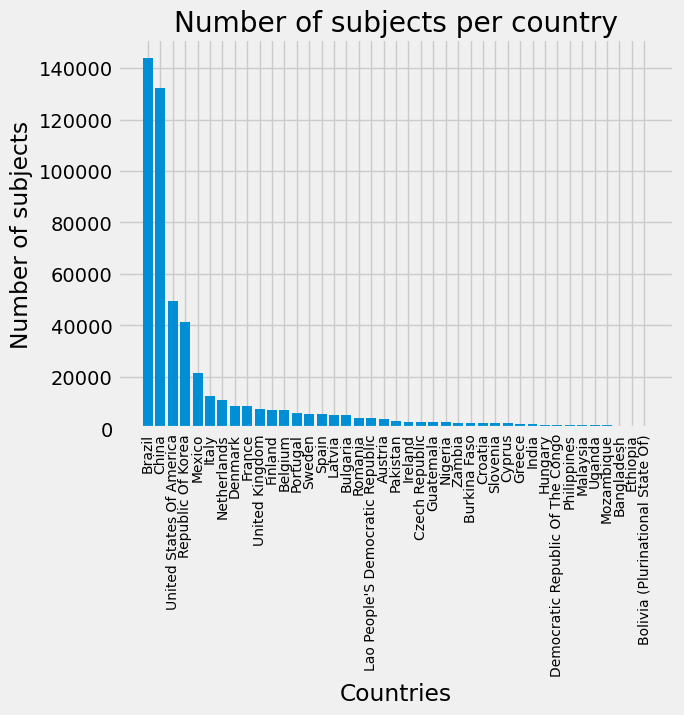

In [1821]:
plt.bar(most_sub_ctry['Country'], most_sub_ctry['Number_of_subjects'])
plt.xticks(most_sub_ctry['Country'], rotation='vertical', size=10)
plt.ylabel("Number of subjects")
plt.xlabel("Countries")
plt.title("Number of subjects per country")
plt.show()

### Na wykresie bardzo dobrze widać jak duża jest dysproporcja co do ilości osob w zależności od kraju. Od razu to wskazuje, że wyciągnięte wnioski mogą być zachwiane przez to ile osob w zależności od kraju było badanych wiec należy wziać to pod uwagę
### Dla dokładności sprawdzę jak duża jest to różnica i jak rozkłada się to pod względem kontynentów

In [1822]:
top5 = most_sub_ctry['Number_of_subjects'].iloc[0:5].sum()
top5

388340

In [1823]:
rest = most_sub_ctry['Number_of_subjects'].iloc[5:].sum()
rest

134711

In [1824]:
top5/rest

2.882763842596373

### Jak widać top5 krajów ma prawie 3 razy wiecej badancyh niż reszta krajów, jest to bardzo duża dysporporcja, wiec ogólna analiza nie jest, aż tak wartościowa 
### Rozbicie na kontynenty pozwoli zobaczyć jak użyteczna będzie globalna analiza i czy nie lepiej będzie analizować każdy kontynent odrębnie. Użyję do tego biblioteki pycountry_convert

In [1825]:
def convert(row): # funkcja przypisująca kod kontynentu w zależności od kraju
    cn_code = pc.country_name_to_country_alpha2(row.Country, cn_name_format="default")
    conti_code = pc.country_alpha2_to_continent_code(cn_code)
    return conti_code

### Trzeba zamienić nazwy kilku krajów bo biblioteka pycountry_convert korzysta z innych nazw krajów niż te które są w dataframe

In [1826]:
continent = food
continent['Country'] = continent['Country'].replace('Republic Of Korea','South Korea')
continent['Country'] = continent['Country'].replace('Bolivia (Plurinational State Of)','Bolivia')
continent['Country'] = continent['Country'].replace('United States Of America','United States of America')
continent['Country'] = continent['Country'].replace("Lao People'S Democratic Republic","Lao People's Democratic Republic")
continent['Country'] = continent['Country'].replace("Democratic Republic Of The Congo","Democratic Republic of the Congo")

In [1827]:
continent['ContinentCode'] = continent.apply(convert, axis=1)
continent

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects,ContinentCode
0,China,2002,A000G,Oat Grain,All,All,All,1157,66172,AS
1,China,2002,A000G,Oat Grain,All,All,Female,608,33953,AS
2,China,2002,A000G,Oat Grain,All,All,Male,549,32219,AS
3,China,2002,A000N,Buckwheat,All,All,All,167,66172,AS
4,China,2002,A000N,Buckwheat,All,All,Female,82,33953,AS
...,...,...,...,...,...,...,...,...,...,...
272338,India,2015,A0EQN,Soft Drinks With Minor Amounts Of Fruits Or Fl...,All,All,Female,8,242,AS
272339,India,2015,A0EQN,Soft Drinks With Minor Amounts Of Fruits Or Fl...,Adults and Elderly,15-49 years,All,8,242,AS
272340,India,2015,A0F4S,Coconut Water,All,All,All,7,242,AS
272341,India,2015,A0F4S,Coconut Water,Adults and Elderly,15-49 years,Female,7,242,AS


### Mam kody kontynentów, wiec niby można by tak to zostawić ale uważam, że dużo ładniej i czytelniej jest jak będa też widoczne nazwy kontynentów

In [1828]:
continent['ContinentCode'].unique()

array(['AS', 'EU', 'NA', 'SA', 'AF'], dtype=object)

In [1829]:
conti_names = {	# stworzenie słownika dla kontynentów, żeby móc zamienić kody kontynentów na nazwy kontynentów
				'AS':'Asia',
				'EU' : 'Europe',
                'NA' : 'North America',
                'SA' : 'South America',
                'AF' : 'Africa'
                }
continent['Continent'] = continent['ContinentCode'].map(conti_names)
continent

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects,ContinentCode,Continent
0,China,2002,A000G,Oat Grain,All,All,All,1157,66172,AS,Asia
1,China,2002,A000G,Oat Grain,All,All,Female,608,33953,AS,Asia
2,China,2002,A000G,Oat Grain,All,All,Male,549,32219,AS,Asia
3,China,2002,A000N,Buckwheat,All,All,All,167,66172,AS,Asia
4,China,2002,A000N,Buckwheat,All,All,Female,82,33953,AS,Asia
...,...,...,...,...,...,...,...,...,...,...,...
272338,India,2015,A0EQN,Soft Drinks With Minor Amounts Of Fruits Or Fl...,All,All,Female,8,242,AS,Asia
272339,India,2015,A0EQN,Soft Drinks With Minor Amounts Of Fruits Or Fl...,Adults and Elderly,15-49 years,All,8,242,AS,Asia
272340,India,2015,A0F4S,Coconut Water,All,All,All,7,242,AS,Asia
272341,India,2015,A0F4S,Coconut Water,Adults and Elderly,15-49 years,Female,7,242,AS,Asia


In [1830]:
continent['Continent'].unique()

array(['Asia', 'Europe', 'North America', 'South America', 'Africa'],
      dtype=object)

### Jak widać wszystko ładnie się udało, wiec moge przypisać continent do food i ponownie stworzyć dataframes dla każdej płci

In [1831]:
food = continent
food_all = food.loc[food['Gender'] == "All"]
food_con = food_all.groupby(['ContinentCode','Number_of_subjects']).sum().reset_index()
food_con = food_con.groupby(['ContinentCode']).sum().reset_index()
food_con = food_con[['ContinentCode','Number_of_subjects']].sort_values(by='Number_of_subjects', ascending=False)
food_con = food_con.groupby(['ContinentCode']).sum().reset_index()
food_con.sum()

ContinentCode         AFASEUNASA
Number_of_subjects        518734
dtype: object

In [1832]:
most_sub_ctry.sum()

Country               BrazilChinaUnited States Of AmericaRepublic Of...
Number_of_subjects                                               523051
dtype: object

### Niestety ale robiąc to w ten sposob, tracę ponad 4000 wyników. Zbyt ważne jest rzeczywiste przedstawienie danych, żeby móc sobie pozwolić na taką stratę, tym bardziej nie wiedząć skąd konkretnie ona pochodzi, wiec wykonam to dodając pare kroków wcześniej.

In [1833]:
food_ctry = food_all.groupby(['Country','Number_of_subjects']).sum().reset_index()
food_ctry = food_ctry.groupby(['Country']).sum().reset_index()
food_con = food_ctry.groupby(['ContinentCode','Number_of_subjects']).sum().reset_index()
food_con = food_con.groupby(['ContinentCode']).sum().reset_index()
food_con = food_con[['ContinentCode','Number_of_subjects']].sort_values(by='Number_of_subjects', ascending=False)

food_con.sum()

ContinentCode         SASASASASASASASASASASASASASASASASASASASASASASA...
Number_of_subjects                                               523051
dtype: object

###  Otrzymany wynik jest taki sam jak w most_sub_ctry ale niestety kontynenty też są zgrupowane, wiec muszę odciać wszystko poza pierwszymi literami kodu, co pozwoli to dobrze podsumować.


In [1834]:
food_con['ContinentCode'] = food_con['ContinentCode'].apply(lambda x: x[0:2])
food_con = food_con.groupby(['ContinentCode']).sum().reset_index().sort_values(by='Number_of_subjects', ascending=False)
food_con

,ContinentCode,Number_of_subjects
1,AS,187248
4,SA,144248
2,EU,108344
3,NA,73032
0,AF,10179


### Wszystko poszło dobrze, więc mogę teraz wizualizować, tylko jeszcze dodam nazwy kontynentów 

In [1835]:
food_con['Continent'] = food_con['ContinentCode'].map(conti_names)
food_con

,ContinentCode,Number_of_subjects,Continent
1,AS,187248,Asia
4,SA,144248,South America
2,EU,108344,Europe
3,NA,73032,North America
0,AF,10179,Africa


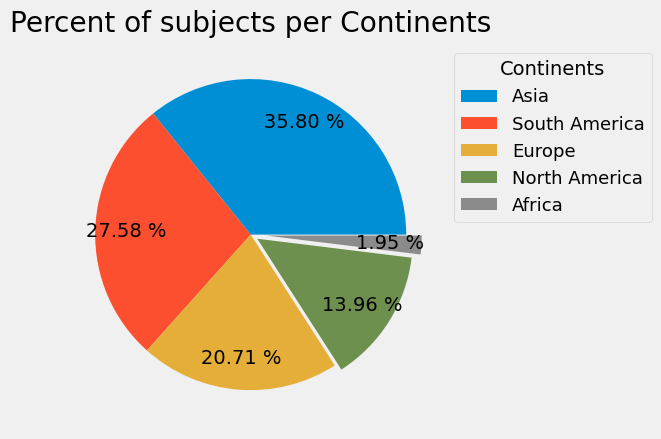

In [1836]:
labels = food_con['Continent']
plt.pie(food_con['Number_of_subjects'], autopct = '%.2f %%', explode=(0,0,0,.05,.1), pctdistance = (0.8))
plt.legend(labels, title='Continents', loc="center left", bbox_to_anchor=(1, 0.75), fontsize="13")
plt.title('Percent of subjects per Continents')
plt.show()

### Na tym wykresie widać natomiast, że nie jest, aż tak złe rozłożenie badanych. Afryka  wiadomo najgorzej wypada ale jednak reszta kontynentów względnie blisko siebie sie znajduje. Pozwala to jednak wyznaczyć ogólne trendy na świecie, co do spożywanych produktów. Gdyby nie sprawdzić tego, jak wygląda rozłożenie na kontynenty, łatwo by można uznać, że nie jest warte robienie globalnej analizy tylko dokładnej dla kraju lub kontynentu.
### Teraz natomiast zajmę sie takim przygotowaniem danych, żeby móc wygodnie przeanalizować najbardziej spożywane produkty, ponieważ nie wszędzie jest AgeClass dla All, wiec inny sposob muszę znaleźć. Będę to wstepnie robić na Oat Grain dla Włoch

In [1837]:
it_oat_all = food_all.loc[food_all['FoodName'] == "Oat Grain"]
it_oat_all = it_oat_all.loc[it_oat_all['Country'] == "Italy"]
it_oat_all

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects,ContinentCode,Continent
212154,Italy,2006,A000G,Oat Grain,All,All,All,4,3307,EU,Europe
212169,Italy,2006,A000G,Oat Grain,Infants and Toddlers,0-35 months,All,0,36,EU,Europe
212170,Italy,2006,A000G,Oat Grain,Children and Adolescents,3-5 years,All,0,67,EU,Europe
212171,Italy,2006,A000G,Oat Grain,Children and Adolescents,6-14 years,All,0,284,EU,Europe
212172,Italy,2006,A000G,Oat Grain,Adults and Elderly,15-49 years,All,2,1603,EU,Europe
212173,Italy,2006,A000G,Oat Grain,Adults and Elderly,50-74 years,All,2,1089,EU,Europe
212174,Italy,2006,A000G,Oat Grain,Adults and Elderly,>75 years,All,0,228,EU,Europe


In [1838]:
it_oat_all[1:].groupby(['Country','FoodName']).sum().reset_index() #sprawdzam czy suma wartości bez SourceAgeClass=All są równe All


,Country,FoodName,Year,FoodCode,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects,ContinentCode,Continent
0,Italy,Oat Grain,12036,A000GA000GA000GA000GA000GA000G,Infants and ToddlersChildren and AdolescentsCh...,0-35 months3-5 years6-14 years15-49 years50-74...,AllAllAllAllAllAll,4,3307,EUEUEUEUEUEU,EuropeEuropeEuropeEuropeEuropeEurope


### Chyba najlepiej bedzie pozbyć się rzędu dla SourceAgeClass w którym jest All i potem podsumować 

In [1839]:
# tworzę maskę która zawiera rzędy z All
mask = it_oat_all['AgeClass'] == 'All'

# używając ~ i maski pozbywam się z it_oat_all tego co zawiera maska
it_oat_all = it_oat_all[~mask]
it_oat_all

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects,ContinentCode,Continent
212169,Italy,2006,A000G,Oat Grain,Infants and Toddlers,0-35 months,All,0,36,EU,Europe
212170,Italy,2006,A000G,Oat Grain,Children and Adolescents,3-5 years,All,0,67,EU,Europe
212171,Italy,2006,A000G,Oat Grain,Children and Adolescents,6-14 years,All,0,284,EU,Europe
212172,Italy,2006,A000G,Oat Grain,Adults and Elderly,15-49 years,All,2,1603,EU,Europe
212173,Italy,2006,A000G,Oat Grain,Adults and Elderly,50-74 years,All,2,1089,EU,Europe
212174,Italy,2006,A000G,Oat Grain,Adults and Elderly,>75 years,All,0,228,EU,Europe


### Widać, że tam metoda zadziałała, wiec muszę wykonać to na podstawowej dataframe i potem podzielić na płcie

In [1840]:
mask = food['AgeClass']== 'All'
food = food[~mask]

In [1841]:
food_all = food.loc[food['Gender'] == "All"]
food_fem = food.loc[food['Gender'] == "Female"]
food_men = food.loc[food['Gender'] == "Male"]

In [1842]:
most_consumed_all = food_all.groupby(['FoodName']).sum().reset_index().sort_values(by='Number_of_consumers', ascending=False)
most_consumed_fem = food_fem.groupby(['FoodName']).sum().reset_index().sort_values(by='Number_of_consumers', ascending=False)
most_consumed_men = food_men.groupby(['FoodName']).sum().reset_index().sort_values(by='Number_of_consumers', ascending=False)
most_consumed_all[['FoodName','Number_of_consumers']].head(10)

,FoodName,Number_of_consumers
1,(All Cereals),142214
2811,"Wheat Bread And Rolls, White (Refined Flour)",135436
1836,Onions,112344
2249,"Rice Grain, Polished",105857
1997,Pig Fresh Meat,104118
2652,Tap Water,92605
2092,Potatoes,89154
375,Carrots,87843
1126,Garlic,84415
2243,Rice Grain,82719


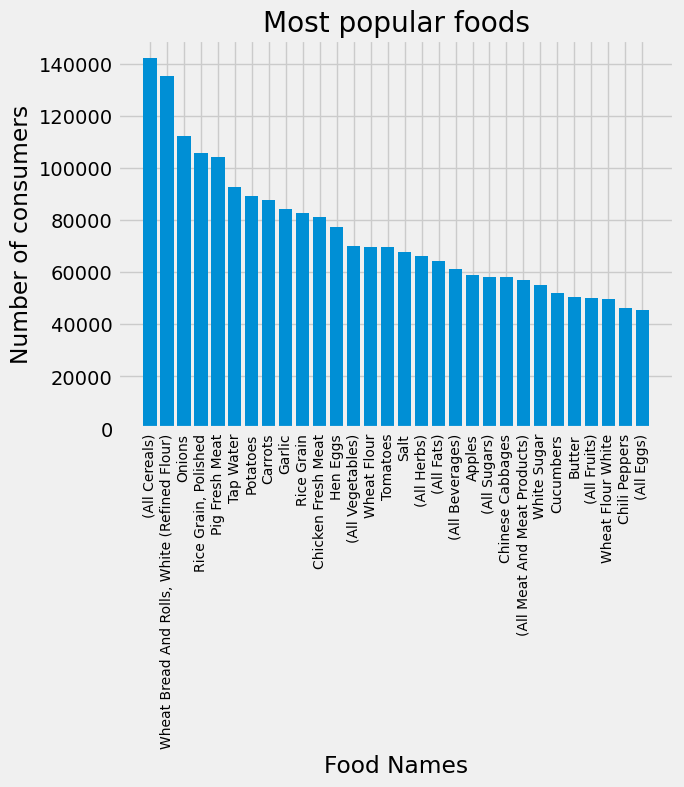

In [1843]:
show_most_consumed_all = most_consumed_all.head(30)
plt.bar(show_most_consumed_all['FoodName'], show_most_consumed_all['Number_of_consumers'])
plt.xticks(show_most_consumed_all['FoodName'], rotation='vertical', size=10)
plt.ylabel("Number of consumers")
plt.xlabel("Food Names")
plt.title("Most popular foods")
plt.show()

### Na wykresie widzimy że najpopularniejszym jedzeniem na świecie są płatki śniadaniowe. Wiadomo że to zbiera razem wszystkie rodzaje płatków ale nadal jest to niesamowite ze przebija to nawet najpopularniejsze warzywa albo zioła które ludzie wydawałoby się dodają do wszystkiego, takie jak np cebula, czosnek. Na drugim miejscu białe pieczywo. Te dwa produkty wskazują, że ludzie bardzo lubią proste produkty, łatwe i szybkie w przygotowaniu w szczególnosci, jeżeli chodzi o śniadania, bo jednak to z tym głownie kojarzą sie płatki i pieczywo. 
### Na szczęście później dzieje sie lepiej, cebula, ryż (nadal biały łuskany ale jednak już jest to produkt z wiekszą ilością aminokwasów i węglowodanów), co ciekawe wieprzowina jest na 5 miejscu, zazwyczaj wydaje się, że to kurczak króluje jako mięso ale na szczęście dane nie wiedzą co to błędne myślenie.
### Ogólnym wnioskiem który można wyciągnąć z tych danych jest to, że górują proste produkty oraz widać tu wymieszanie wielu kultur

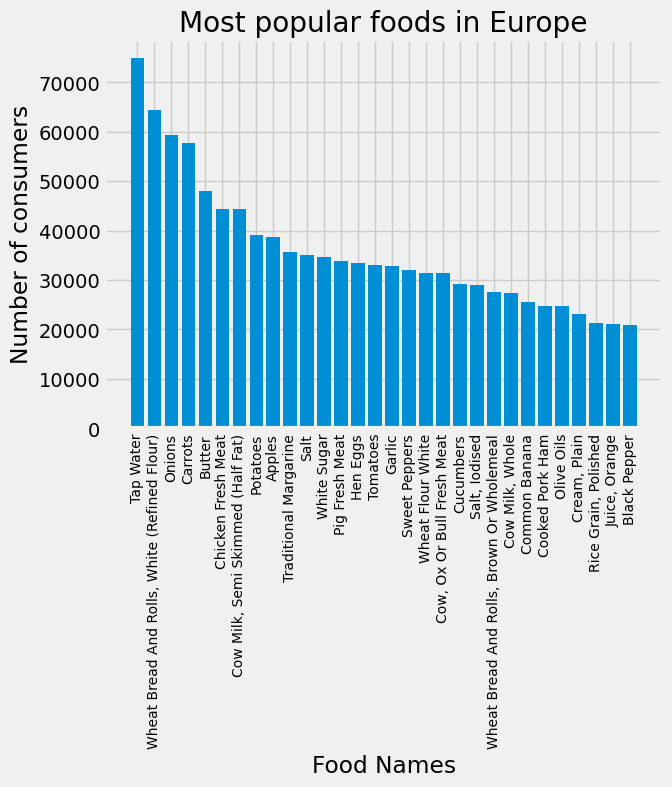

In [1844]:
#sprawdzić jak wygląda sprawa dla Europy
food_all = food.loc[food['Gender'] == "All"]
food_all_eu = food_all.loc[food_all['Continent'] == "Europe"]
most_consumed_all_eu = food_all_eu.groupby(['FoodName']).sum().reset_index().sort_values(by='Number_of_consumers', ascending=False)
most_consumed_all_eu = most_consumed_all_eu.head(30)

plt.bar(most_consumed_all_eu['FoodName'], most_consumed_all_eu['Number_of_consumers'])
plt.xticks(most_consumed_all_eu['FoodName'], rotation='vertical', size=10)
plt.ylabel("Number of consumers")
plt.xlabel("Food Names")
plt.title("Most popular foods in Europe")
plt.show()

### Gdy tylko przełączę dane na Europę widać różnicę w pierwszym produkcie, nie ma tu płatków śniadaniowych tylko woda z kranu. Może wynikać to z tego, bezpieczeństwo picia wody z kranu w Europie jest na dużo wyższym poziomie oraz, że były kampanie zachęcające do picia wody z kranu (w Poslce również je mieliśmy). Drugie miejsce Bez zmian, białe pieczywo króluje (zapewne nie bez winy jest tu Francja) ale potem znowu robi się ciekawie, cebula, marchew, masło czyli podstawy większości dań i sosów Europejskich takich jak risotto, rosół, Ragù alla bolognese, sosu demi glace i wiele innych. Również mięso z kurczaka znajduje się wyżej od wieprzowego. Mleko które też jak widać częściej jest spożywane w Europie niż w reszcie świata (badanie na to żę inne kraje maja spore uczulenie na laktoze). Niepokojącą rzeczą jest natomiast wysokie miejsce margaryny(poprzez tradycyjną rozumiem utwardzoną czy tą zawierającą tłuszcze trans) oraz soli i cukru (badanie na temat negatywnych skutków cukru i soli?). Dużo dalej znajduje sie natomiast ryż, widać że dużo mniej go spożywamy. Też niebezpieczna rzeczą jest to że rozdzielona jest sól na jodowaną i niejdowaną co znaczy że sól powinna być na wyższym miejscu. również wysokie miejsce pomidorów, czosnku i oliwy z oliwek pokazuje duży wpływ kuchni włoskiej, ogolnie na podstwie tego wykresu można zauważyć duży wpływ kuchni włoskiej i francuskiej na europę.

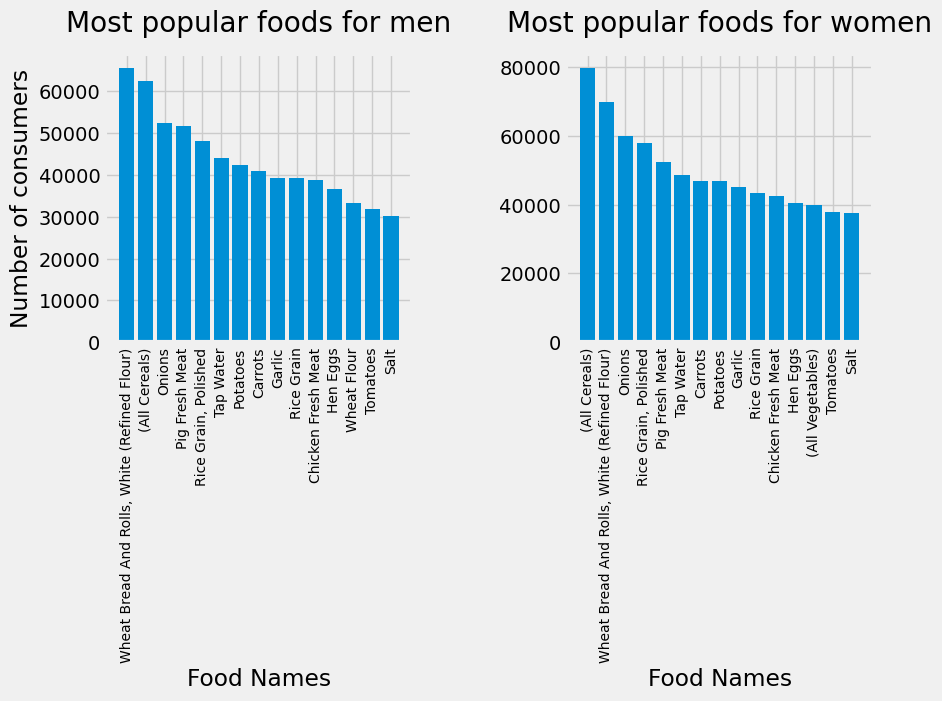

In [1845]:
show_most_consumed_men = most_consumed_men.head(15)
show_most_consumed_fem = most_consumed_fem.head(15)
plt.subplot(1, 2, 1)
plt.bar(show_most_consumed_men['FoodName'], show_most_consumed_men['Number_of_consumers'])
plt.xticks(show_most_consumed_men['FoodName'], rotation='vertical', size=10)
plt.ylabel("Number of consumers")
plt.xlabel("Food Names")
plt.title("Most popular foods for men", y=1.05)

plt.subplot(1, 2, 2)
plt.bar(show_most_consumed_fem['FoodName'], show_most_consumed_fem['Number_of_consumers'])
plt.xticks(show_most_consumed_fem['FoodName'], rotation='vertical', size=10)
plt.xlabel("Food Names")
plt.title("Most popular foods for women", y=1.05)

plt.subplots_adjust(left=0.1,
                    bottom=0.5,
                    right=1.3,
                    top=1.1,
                    wspace=0.5,
                    hspace=1)
plt.show()

In [1846]:
#musze podzielić ilość kobiet która je płatki na całkowita ilość kobiet

In [1847]:
show_most_consumed_fem[:1]['Number_of_consumers']/food_fem['Number_of_subjects'].unique().sum()*100


1   49.22
Name: Number_of_consumers, dtype: float64

In [1848]:
show_most_consumed_men[:1]['Number_of_consumers']/food_men['Number_of_subjects'].unique().sum()*100

2694   48.40
Name: Number_of_consumers, dtype: float64

### <a class="anchor" id="summary"></a> Prównuja konsumpcje mężczyzn i kobiet dwie rzeczy najbardziej rzucają mi sie w oczy, pierwsza że płatki u obu płci są na pierwszym miejscu chociaż co ciekawe kobiety jedza o 0.59 pkt% wiecej płatków od mężczyzn. druga że u kobiet warzywa są na 3 miejscu a u mężczyzn na 6, najprawdopodobniej wynika to z tego że kobiety prędzej są na diecie wegeteriańskiej lub wegańskiej plus ogolnie tendencje wskazują żę społecznie przyjmuje sie że mężczyźni wiecej miesa mogą jesć na co wskazuje to badanie https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3490048/ , ale dla dokładnej analizy tego zjawiska przydałoby sie wiecej danych ponieważ może to wynikać np że organizm mężczyzn potrzebuje wiecej mięsa np przez kreatynę które ono dostarcza ale skupiajmy sie na faktach. widać tu tendencje że kobiety jedzą wiecej warzyw. Również mięso wieprzowe u mężczyzn jest na wyższym miejscu. 
### Na podstawie tego co piszę można by wywnioskować że kobiety mają zdrowszą diete ale jednak nie można tak od razu zrobić, ponieważ po pierwsze te płatki których jednak wiecej spożywają ale również to że do top10 u kobiet załapuje sie cukier a u mężczyzn nie oraz żę tłuszcze u kobiet zajmują wyższe miejce. Na podstawie tego widać że nie jest to takie proste, isteniej możliwość że z powodu trzymania zdrowszej diety jeżeli chodzi o np obiady to w przypadku przekąsek a w szczególości tych słodkich i tłustych to kobiety ich wiecej spożywają. Może to wskazywać na prostą zależność że ludzie naturalnie szukają równowagi. 
### jeżeli chodzi o wnioski które by pomogły w tworzeniu odpowiedniego menu do restauracji to można do tego podejśc dwujako, ludzie lubią jeść proste i szybkie posiłki oraz rzecyz które znają dobrze, tylko pytanie czy w ludzie do restauracji chodzą po to żeby jeść to co zawsze? uważam że to zależy, jeżeli chodzi o takie miejsca jak bary mleczne, kuchnie domowe czy nawet kebaby to dobrze żeby były tam opcje które ludzie znają, ale natwomiast w przypadku restauracji wyższej klasy dużym plusem może być własnie wyjście z tej grupy najbardziej popularnych produktów, ludzie lubią odkrywać nowe rzeczy i może to pozostawić to na nich duże wrażenie, w końcu nie będą płacić dużo pieniędzy za coś co mogą zrobić w domu, własnie te rzeczy które są nietypowe, których nie zna wiekszość lub nie jest do nich przywyczajona mogą wywowałać zachwyt. do analizy tego dokładnie trzeba by użyć innych danych ale można takie wnioski wyciągnąć z tych wykresów 

### porównanie dla mężczyzn i kobiet w europie

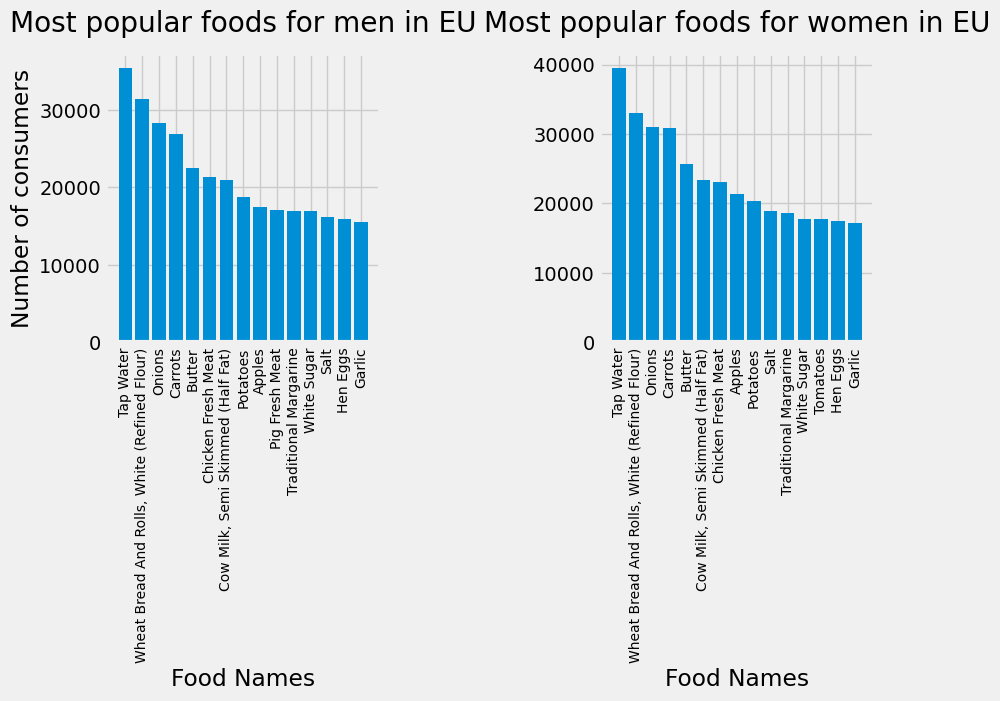

In [1849]:
food_fem_eu = food_fem.loc[food_fem['Continent'] == "Europe"]
food_men_eu = food_men.loc[food_men['Continent'] == "Europe"]
most_consumed_fem_eu = food_fem_eu.groupby(['FoodName']).sum().reset_index().sort_values(by='Number_of_consumers', ascending=False)
most_consumed_men_eu = food_men_eu.groupby(['FoodName']).sum().reset_index().sort_values(by='Number_of_consumers', ascending=False)


show_most_consumed_men_eu = most_consumed_men_eu.head(15)
show_most_consumed_fem_eu = most_consumed_fem_eu.head(15)
plt.subplot(1, 2, 1)
plt.bar(show_most_consumed_men_eu['FoodName'], show_most_consumed_men_eu['Number_of_consumers'])
plt.xticks(show_most_consumed_men_eu['FoodName'], rotation='vertical', size=10)
plt.ylabel("Number of consumers")
plt.xlabel("Food Names")
plt.title("Most popular foods for men in EU", y=1.05)

plt.subplot(1, 2, 2)
plt.bar(show_most_consumed_fem_eu['FoodName'], show_most_consumed_fem_eu['Number_of_consumers'])
plt.xticks(show_most_consumed_fem_eu['FoodName'], rotation='vertical', size=10)
plt.xlabel("Food Names")
plt.title("Most popular foods for women in EU", y=1.05)

plt.subplots_adjust(left=0.1,
                    bottom=0.5,
                    right=1.3,
                    top=1.1,
                    wspace=0.8,
                    hspace=1)
plt.show() # może dodać legende i różne kolory wykresu dla kobiet i mężczyzn żeby takie długi tytuł nie był

In [1850]:
from IPython.display import HTML, display

def set_background(color):
    script = ("var cell = this.closest('.code_cell');"
              "var editor = cell.querySelector('.input_area');"
              "editor.style.background='{}';" 
              "this.parentNode.removeChild(this)"
             ).format(color)
    display(HTML('<img src onerror="{}">'.format(script)))
    
    
set_background('#E9FDFd')

In [1851]:
set_background('#E9FDFd')
print('hello')

hello


## hello <a class="anchor" id="hello"></a>


### jak widać nawet w bazach danych branych z źródeł które wydawały by się mieć je bardzo dobrze wyczyszczone i bez błędów nadal one mogą występować i nie nalezy brać za pewnik że wszystko bedzie dobrze, samemu należy to sprawdzać zawsze bo błędy mogą występować 

# rzeczy które mogą zakłamywać wynik: [&uarr;](#top)
albo moje błędy lub założenia 